In [2]:
#importing my scraped and cleaned zameen listing file from selenium project

from google.colab import files
ff = files.upload()

Saving zameen_listings_cleaned.csv to zameen_listings_cleaned.csv


In [3]:
import pandas as pd
df = pd.read_csv("zameen_listings_cleaned.csv")

In [4]:
df.head()

,Title,Price,Area_sqft,Bedrooms,Bathrooms,Location,Location_encoded,Price_scaled,Area_scaled,Bedrooms_scaled,Bathrooms_scaled,Price_per_sqft
0,5 Marla Designer House In B-17 Multi Gardens,21000000.0,1361.25,4,4,"MPCHS - Multi Gardens, B-17",8,0.083721,0.048913,0.333333,0.500000,15426.997245
1,House For Sale FMC,24000000.0,1361.25,4,4,"MPCHS - Multi Gardens, B-17",8,0.111628,0.048913,0.333333,0.500000,17630.853994
2,Designer 5 Marla House in B-17 Faisal Hills,18500000.0,1361.25,3,4,"MPCHS - Multi Gardens, B-17",8,0.060465,0.048913,0.222222,0.500000,13590.449954
3,Corner House For Sale In B17 Islamabad Block F,25000000.0,1361.25,5,5,"MPCHS - Block F, MPCHS - Multi Gardens",7,0.120930,0.048913,0.444444,0.666667,18365.472911
4,Book House Today In MPCHS - Block B,95000000.0,5445.00,6,6,"MPCHS - Block B, MPCHS - Multi Gardens",2,0.772093,0.456522,0.555556,0.833333,17447.199265


In [5]:
df.drop(['Title',"Price","Area_sqft","Bedrooms","Bathrooms","Location","Location_encoded","Price_per_sqft"], axis=1, inplace=True)

In [6]:
df.head()

,Price_scaled,Area_scaled,Bedrooms_scaled,Bathrooms_scaled
0,0.083721,0.048913,0.333333,0.500000
1,0.111628,0.048913,0.333333,0.500000
2,0.060465,0.048913,0.222222,0.500000
3,0.120930,0.048913,0.444444,0.666667
4,0.772093,0.456522,0.555556,0.833333


In [8]:
df.describe()

,Price_scaled,Area_scaled,Bedrooms_scaled,Bathrooms_scaled
count,499.000000,500.000000,500.000000,500.000000
mean,0.230452,0.137788,0.414000,0.711667
std,0.182848,0.117840,0.127345,0.172501
min,0.000000,0.000000,0.000000,0.000000
25%,0.102326,0.048913,0.333333,0.666667
50%,0.167442,0.130435,0.444444,0.833333
75%,0.306977,0.184783,0.444444,0.833333
max,1.000000,1.000000,1.000000,1.000000


In [10]:
# only missing one value in price column. Interpolating the missing value.
df["Price_scaled"] = df["Price_scaled"].interpolate(method="linear")


Final parameters (theta): [-0.12292154  0.83278218  0.32197779  0.14573928]
Train MSE (Scratch): 0.005761439908567276
Test MSE (Scratch): 0.006838883688504195
Train MSE (Sklearn): 0.003894346628531823
Test MSE (Sklearn): 0.004321180362014082


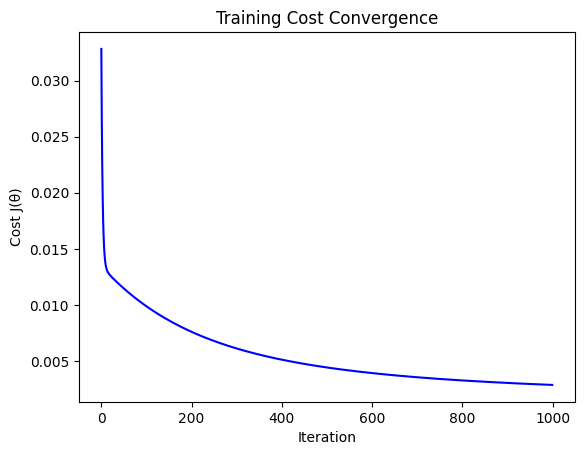

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# preparing X (traiing features) and y (output feature)
X = df[['Area_scaled', 'Bedrooms_scaled', 'Bathrooms_scaled']].values
y = df['Price_scaled'].values.reshape(-1, 1)


m = len(y)
# concatenating a column for Y itercept.
X_b = np.c_[np.ones((m, 1)), X]

#splitting the data into 80 percent traing and 20 ercent testing data
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# theta vector for our weights
theta = np.zeros((X_train.shape[1], 1))

# mean square error calculation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# gradient descent algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


# Train on training data
theta_final, cost_history = gradient_descent(X_train, y_train, theta, alpha=0.1, iterations=1000)

# Predictions
y_train_pred = X_train.dot(theta_final)
y_test_pred = X_test.dot(theta_final)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Final parameters (theta):", theta_final.ravel())
print("Train MSE (Scratch):", mse_train)
print("Test MSE (Scratch):", mse_test)



# Now using SKLEARN for model training and predictions
lin_reg = LinearRegression()
lin_reg.fit(X_train[:, 1:], y_train)

y_train_pred_sklearn = lin_reg.predict(X_train[:, 1:])
y_test_pred_sklearn = lin_reg.predict(X_test[:, 1:])

print("Train MSE (Sklearn):", mean_squared_error(y_train, y_train_pred_sklearn))
print("Test MSE (Sklearn):", mean_squared_error(y_test, y_test_pred_sklearn))

#plot convergece of the training cost
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Training Cost Convergence")
plt.show()


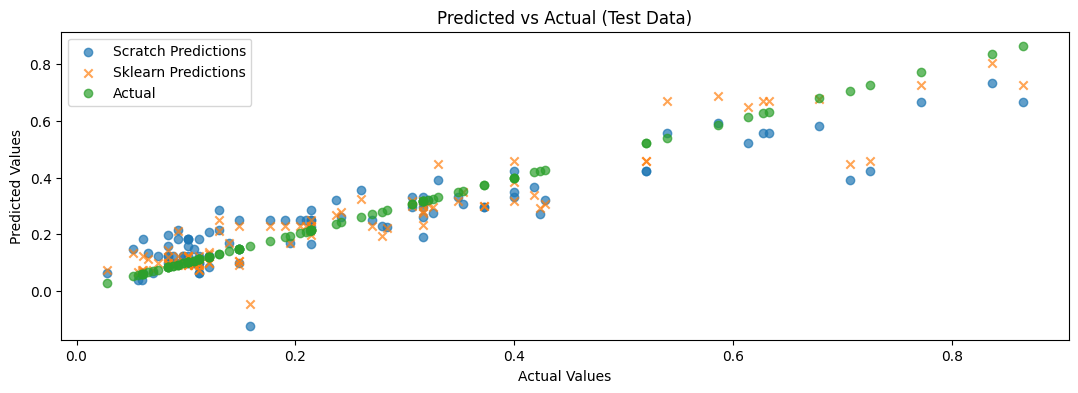

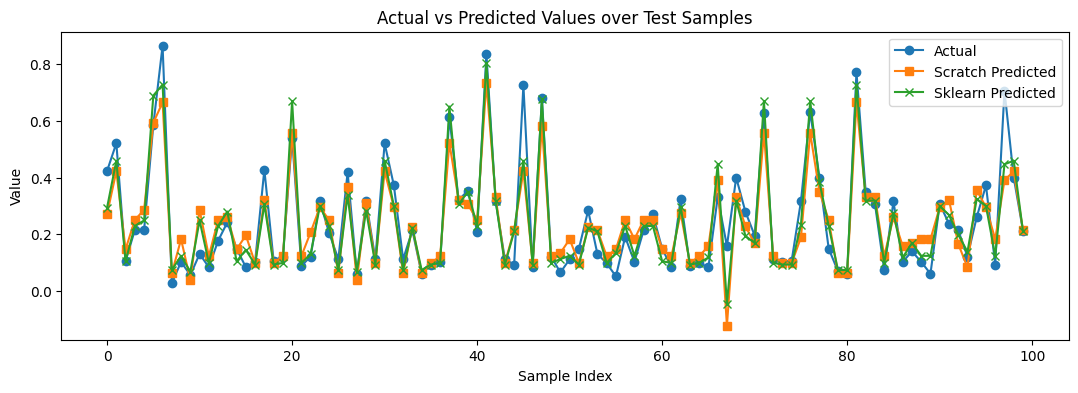

In [36]:

#plot actual vs predicted prices
plt.figure(figsize=(13,4))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Scratch Predictions")
plt.scatter(y_test, y_test_pred_sklearn, alpha=0.7, marker="x", label="Sklearn Predictions")
plt.scatter(y_test, y_test, alpha=0.7, label="Actual", marker="o")



plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Test Data)")
plt.legend()
plt.show()


plt.figure(figsize=(13,4))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(y_test_pred, label="Scratch Predicted", marker="s")
plt.plot(y_test_pred_sklearn, label="Sklearn Predicted", marker="x")


plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values over Test Samples")
plt.legend()
plt.show()

